In [1]:
import pandas as pd

In [3]:
movie_reviews = pd.read_csv("movies_review/IMDB Dataset.csv")

In [4]:
movie_reviews.isnull().values.any()

False

In [5]:
movie_reviews.shape

(50000, 2)

In [6]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
movie_reviews['review'][22]

"What an absolutely stunning movie, if you have 2.5 hrs to kill, watch it, you won't regret it, it's too much fun! Rajnikanth carries the movie on his shoulders and although there isn't anything more other than him, I still liked it. The music by A.R.Rehman takes time to grow on you but after you heard it a few times, you really start liking it."

In [9]:
import seaborn as sns

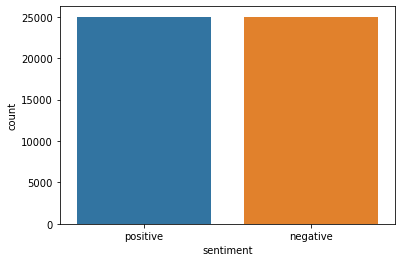

In [10]:
sns.countplot(x="sentiment", data = movie_reviews)

In [11]:
def preprocess_text(sen):
    sentence = remove_tags(sen)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [13]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [14]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))


In [16]:
y = movie_reviews['sentiment']
import numpy as np
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
maxlen = 100

In [24]:

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [25]:
vocab_size = len(tokenizer.word_index) + 1


In [26]:
print(vocab_size)

92547


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()

In [30]:
model.add(Embedding(vocab_size, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          9254700   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 9,574,765
Trainable params: 9,574,765
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [34]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
250/250 [==============================] - 24s 96ms/step - loss: 0.4275 - acc: 0.7963 - val_loss: 0.3424 - val_acc: 0.8496
Epoch 2/6
250/250 [==============================] - 23s 91ms/step - loss: 0.2083 - acc: 0.9194 - val_loss: 0.3809 - val_acc: 0.8384
Epoch 3/6
250/250 [==============================] - 23s 93ms/step - loss: 0.0626 - acc: 0.9833 - val_loss: 0.5152 - val_acc: 0.8259
Epoch 4/6
250/250 [==============================] - 23s 93ms/step - loss: 0.0094 - acc: 0.9984 - val_loss: 0.6866 - val_acc: 0.8215
Epoch 5/6
250/250 [==============================] - 23s 92ms/step - loss: 8.0322e-04 - acc: 0.9999 - val_loss: 0.8862 - val_acc: 0.8229
Epoch 6/6
250/250 [==============================] - 23s 93ms/step - loss: 1.7123e-04 - acc: 1.0000 - val_loss: 1.0825 - val_acc: 0.8213


In [35]:
score = model.evaluate(X_test, y_test, verbose=1)


313/313 [==============================] - 3s 9ms/step - loss: 0.9946 - acc: 0.8287


In [36]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.9946029186248779
Test Accuracy: 0.8287000060081482


In [38]:
import matplotlib.pyplot as plt

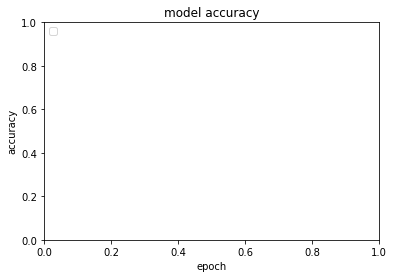

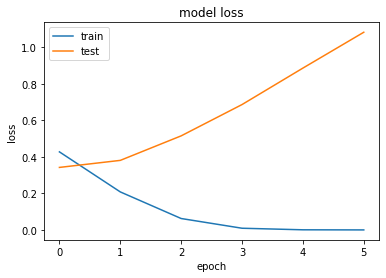

In [39]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()